# MS/MS Analysis of Curcumin

In [30]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import venn
import matplotlib.pyplot as plt

#### Venn Diagram colors

In [2]:
default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

### Initialize variables

In [3]:
parentDTXSID = 'DTXSID4034150'
parentSMILES = 'COC1=C(C=CC(=C1)C=CC(=O)CC(=O)C=CC2=CC(=C(C=C2)O)OC)O'
parentINCHIKEY = Chem.MolToInchiKey(Chem.MolFromSmiles(parentSMILES))
root_dir = r'L:\Lab\NCCT_ExpoCast\ExpoCast2020\SSA-Metabolism\CaseStudy\Curcumin_CaseStudy'
MSMS_results = pd.read_csv(root_dir + r'\CFMID_Merged\MergedCFMIDResults.csv')

### Generate Identification DataFrame

In [4]:
identificationDF = pd.DataFrame(columns = ['Feature_Mass', 'Identifier', 'Identifier_Level', 'InChIKey' ,'Confidence', 'Formula_Score', 'MSMS_Score'])

### Predicted/Reported Metabolites list

In [5]:
aggregatedMetabolites = pd.read_csv(r'L:\Lab\NCCT_ExpoCast\ExpoCast2020\SSA-Metabolism\CaseStudy\metabolite_masterList.csv')

In [6]:
aggregatedMetabolites = aggregatedMetabolites[aggregatedMetabolites['Parent_DTXSID'] == parentDTXSID]
aggregatedMetabolites['INCHIKEY'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in aggregatedMetabolites['SMILES']]
aggregatedMetabolites

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,INCHIKEY
687,DTXSID4034150,NaN,O=CCCC(=O)c1ccc(F)cc1,C10H9FO2,180.058658,False,True,1,0,1,1,0,IUPCCVUTZAKOGW-UHFFFAOYSA-N
688,DTXSID4034150,NaN,O=C(O)CCC(=O)c1ccc(F)cc1,C10H9FO3,196.053572,False,True,1,1,1,1,0,WUYWHIAAQYQKPP-UHFFFAOYSA-N
689,DTXSID4034150,NaN,O=C(O)CCC(O)c1ccc(F)cc1,C10H11FO3,198.069222,False,True,0,1,1,0,0,UOBOSSRBVANWMD-UHFFFAOYSA-N
690,DTXSID4034150,NaN,O=CCCC(O)c1ccc(F)cc1,C10H11FO2,182.074308,False,True,1,0,1,0,0,QOGMGTGBNJSTQW-UHFFFAOYSA-N
691,DTXSID4034150,DTXSID7057733,OC1(c2ccc(Cl)cc2)CCNCC1,C11H14ClNO,211.076392,False,True,1,1,1,1,1,LZAYOZUFUAMFLD-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,DTXSID4034150,NaN,O=S(=O)(O)Oc1cc(Cl)ccc1C1(O)CCNCC1,C11H14ClNO5S,307.028121,False,True,0,0,0,0,0,ORCPETHFZXGOJF-UHFFFAOYSA-N
834,DTXSID4034150,NaN,O=C(CCC(=O)c1ccc(F)cc1)OC1OC(C(=O)O)C(O)C(O)C1O,C16H17FO9,372.085660,False,True,0,0,0,1,0,PPYBYZRYCIBPTC-UHFFFAOYSA-N
835,DTXSID4034150,NaN,O=C(O)CNC(=O)CCC(=O)c1ccc(F)cc1,C12H12FNO4,253.075036,False,True,0,0,0,0,0,DHGAHKOXEVKCKD-UHFFFAOYSA-N
836,DTXSID4034150,NaN,O=C(CCCN1CCC(OS(=O)(=O)O)(c2ccc(Cl)cc2)CC1)c1c...,C21H23ClFNO5S,455.096950,False,True,0,0,0,0,0,BJJYBEASWQLRPD-UHFFFAOYSA-N


### CFMID Identifications

In [7]:
MSMS_results

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE
0,368.12123,DTXCID50471807,C15H29IO2,OC(=O)CCCCCCCCCCCCCCI,368.1211,0.005208,0.023841
1,368.12599,DTXCID40222749,C21H20O6,COc1ccc2CC3COC(=O)C3C(c3ccc4OCOc4c3)c2c1OC,368.1211,0.085349,0.390680
2,368.12599,DTXCID601070183,C21H20O6,CCOC1=CC=CC=C1C=C1OC2=CC(OC(C)C(=O)OC)=CC=C2C1=O,368.1211,0.078104,0.357518
3,368.12599,DTXCID40214164,C21H20O6,COc1ccc(cc1)C1Oc2c(CC=C(C)C)c(O)cc(O)c2C(=O)C1=O,368.1211,0.033717,0.154339
4,368.12599,DTXCID20266409,C21H20O6,CCOC(=O)C1=C(OC(C)=O)C=C2CCC3=CC=CC=C3C2=C1OC(...,368.1211,0.040495,0.185363
5,368.12599,DTXCID4076928,C21H20O6,COC1=C(O)C=C(C=C1)C1=COC2=C(C(O)=C(CC=C(C)C)C(...,368.1211,0.039920,0.182731
6,368.12599,DTXCID0077356,C21H20O6,COC1=CC(O)=CC2=C1C(=O)C(=CO2)C1=CC(CC=C(C)C)=C...,368.1211,0.033057,0.151318
7,368.12599,DTXCID1034052,C21H20O6,C=CC(=O)OCCCCOC(=O)OC1=CC=C(C=C1)C(=O)C1=CC=CC=C1,368.1211,0.034182,0.156466
8,368.12599,DTXCID80508791,C21H20O6,O=C(CCCC(=O)OCC(=O)C1=CC=CC=C1)OCC(=O)C1=CC=CC=C1,368.1211,0.018245,0.083515
9,368.12599,DTXCID00734853,C21H20O6,CCCCC=CC1=C(O)C=C2C(=O)C3=C(C(O)=CC(OC)=C3)C(=...,368.1211,0.015348,0.070256


In [8]:
print('Num features in MSMS data: ' + str(len(MSMS_results['Feature_MASS'].unique())))

Num features in MSMS data: 1


## Match MSMS predictions against known/predicted metabolites

In [9]:
MSMS_results['InchiKey'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in MSMS_results['SMILES']]
MSMS_results.drop_duplicates(subset = 'InchiKey', inplace = True)
MSMS_results['Predicted'] = [True if x in aggregatedMetabolites['INCHIKEY'].values or x == parentINCHIKEY else False for x in MSMS_results['InchiKey']]

In [10]:
predictedSubset = MSMS_results[MSMS_results['Predicted'] == True]
predictedSubset

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE,InchiKey,Predicted
27,368.12599,DTXCID20809719,C21H20O6,COC1=CC(C=CC(=O)CC(=O)C=CC2=CC(OC)=C(O)C=C2)=C...,368.1211,0.183517,0.840042,VFLDPWHFBUODDF-UHFFFAOYSA-N,True


In [11]:
for idx, compound in predictedSubset.iterrows():
    rowDF = pd.DataFrame(data = {'Feature_Mass' : compound['Feature_MASS'],
                                 'Identifier': compound['SMILES'],
                                 'Identifier_Level' : 'Structure - MS2',
                                 'InChIKey' : Chem.MolToInchiKey(Chem.MolFromSmiles(compound['SMILES'])),
                                 'Confidence' : '2b',
                                 'Formula_Score' : None,
                                 'MSMS_Score' : compound['quotient_SCORE']}, index=[idx])
    identificationDF = identificationDF.append(rowDF)

In [12]:
identificationDF

,Feature_Mass,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_Score
27,368.1211,COC1=CC(C=CC(=O)CC(=O)C=CC2=CC(OC)=C(O)C=C2)=C...,Structure - MS2,VFLDPWHFBUODDF-UHFFFAOYSA-N,2b,None,0.840042


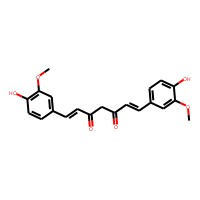

In [13]:
mols = []
for featureMass in predictedSubset['Feature_MASS'].unique():
    rows = predictedSubset[predictedSubset['Feature_MASS'] == featureMass]
    mols = mols + [Chem.MolFromSmiles(x) for x in rows['SMILES']]
img = Draw.MolsToGridImage(mols, molsPerRow=len(mols), subImgSize=(200,200))
display(img)

In [14]:
for chem in predictedSubset['SMILES']:
    Draw.MolToFile(Chem.MolFromSmiles(chem), root_dir + '\Figures\MOLImage' +chem+ '.png')

## Find structures missed by CFMID but matched between predictions/reported and MS labeling

In [15]:
featureList = pd.read_csv(root_dir + '\Filtered_features\FeatureList_subset.csv')
#Clean naming of formula
featureList['Formula'] = featureList['Formula'].apply(lambda x: x.rsplit('Esi')[0] if 'Esi' in x else x.rsplit('_mfg')[0] if '_mfg' in x else x)
#Remove features that have a formula already identified in predictedSubset
featureList = featureList[~featureList['Formula'].isin(predictedSubset['FORMULA'])]

In [16]:
featureList

,index,Feature_ID,Formula,Score,Mass,Retention_Time,BlankG00,BlankG01,BlankG02,Gluc00,...,Super42,BlankSub_Median_Super4,BlankSub_Max_Median_ALLSamples_Super4,Has_Adduct_or_Loss,Is_Adduct_or_Loss,Adduct_or_Loss_Info,Annotation_Source,Formula_Clean,KMeans,orderCat


In [17]:
allSus = pd.read_csv('L:\\Lab\\NCCT_ExpoCast\\ExpoCast2020\\SSA-Metabolism\\CaseStudy\\metabolite_masterList.csv')
allSus = allSus.fillna('None')
allSus = allSus[allSus['Parent_DTXSID'] == parentDTXSID]
allSus['Metabolite_INCHIKEY'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in allSus['SMILES']]

In [18]:
allSus

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
687,DTXSID4034150,None,O=CCCC(=O)c1ccc(F)cc1,C10H9FO2,180.058658,False,True,1,0,1,1,0,IUPCCVUTZAKOGW-UHFFFAOYSA-N
688,DTXSID4034150,None,O=C(O)CCC(=O)c1ccc(F)cc1,C10H9FO3,196.053572,False,True,1,1,1,1,0,WUYWHIAAQYQKPP-UHFFFAOYSA-N
689,DTXSID4034150,None,O=C(O)CCC(O)c1ccc(F)cc1,C10H11FO3,198.069222,False,True,0,1,1,0,0,UOBOSSRBVANWMD-UHFFFAOYSA-N
690,DTXSID4034150,None,O=CCCC(O)c1ccc(F)cc1,C10H11FO2,182.074308,False,True,1,0,1,0,0,QOGMGTGBNJSTQW-UHFFFAOYSA-N
691,DTXSID4034150,DTXSID7057733,OC1(c2ccc(Cl)cc2)CCNCC1,C11H14ClNO,211.076392,False,True,1,1,1,1,1,LZAYOZUFUAMFLD-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,DTXSID4034150,None,O=S(=O)(O)Oc1cc(Cl)ccc1C1(O)CCNCC1,C11H14ClNO5S,307.028121,False,True,0,0,0,0,0,ORCPETHFZXGOJF-UHFFFAOYSA-N
834,DTXSID4034150,None,O=C(CCC(=O)c1ccc(F)cc1)OC1OC(C(=O)O)C(O)C(O)C1O,C16H17FO9,372.085660,False,True,0,0,0,1,0,PPYBYZRYCIBPTC-UHFFFAOYSA-N
835,DTXSID4034150,None,O=C(O)CNC(=O)CCC(=O)c1ccc(F)cc1,C12H12FNO4,253.075036,False,True,0,0,0,0,0,DHGAHKOXEVKCKD-UHFFFAOYSA-N
836,DTXSID4034150,None,O=C(CCCN1CCC(OS(=O)(=O)O)(c2ccc(Cl)cc2)CC1)c1c...,C21H23ClFNO5S,455.096950,False,True,0,0,0,0,0,BJJYBEASWQLRPD-UHFFFAOYSA-N


In [19]:
for idx, compound in featureList.iterrows():
    formulaFilter = allSus['Formula'].str.contains(compound['Formula'])
    if sum(formulaFilter) == 1:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Identifier': allSus.loc[formulaFilter, 'SMILES'].values[0],
                                 'Identifier_Level' : 'Structure - MS1',
                                 'InChIKey' : allSus.loc[formulaFilter, 'Metabolite_INCHIKEY'].values[0],
                                 'Confidence' : '3',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        identificationDF = identificationDF.append(tmpDF)
    elif sum(formulaFilter) == 0:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Identifier': compound['Formula'],
                                 'Identifier_Level' : 'Formula',
                                 'InChIKey' :  None,
                                 'Confidence' : '4',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        
        identificationDF = identificationDF.append(tmpDF)

In [20]:
identificationDF.sort_values(by = 'Confidence')

,Feature_Mass,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_Score
27,368.1211,COC1=CC(C=CC(=O)CC(=O)C=CC2=CC(OC)=C(O)C=C2)=C...,Structure - MS2,VFLDPWHFBUODDF-UHFFFAOYSA-N,2b,None,0.840042


In [21]:
matchedDF = allSus[(allSus['Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) | (allSus['Reported'] == 1)]
matchedDF

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
691,DTXSID4034150,DTXSID7057733,OC1(c2ccc(Cl)cc2)CCNCC1,C11H14ClNO,211.076392,False,True,1,1,1,1,1,LZAYOZUFUAMFLD-UHFFFAOYSA-N
692,DTXSID4034150,DTXSID50473907,O=C(CCC[N+]1([O-])CCC(O)(c2ccc(Cl)cc2)CC1)c1cc...,C21H23ClFNO3,391.135049,False,True,1,1,1,0,1,LDKZFGVWYVWUSG-UHFFFAOYSA-N
704,DTXSID4034150,DTXSID00154895,O=C(CCC[n+]1ccc(-c2ccc(Cl)cc2)cc1)c1ccc(F)cc1,C21H18ClFNO+,354.105547,False,True,0,1,0,0,1,KAPIKUHBALFONG-UHFFFAOYSA-N
705,DTXSID4034150,DTXSID70747874,O=C(CCCN1CCC(OC2OC(C(=O)O)C(O)C(O)C2O)(c2ccc(C...,C27H31ClFNO8,551.172223,False,True,1,1,0,1,1,ZFNLYKVTHNLKNZ-UHFFFAOYSA-N
711,DTXSID4034150,DTXSID101025826,O=C(CCCN1CCC(O)(C2=CC=C(Cl)C=C2)CC1)C1=C(O)C=C...,C21H23ClFNO3,391.135049,True,True,1,0,0,0,1,KKKSAJSVALHFGG-UHFFFAOYSA-N
716,DTXSID4034150,DTXSID101025826,O=C(CCCN1CCC(O)(C2=CC=C(Cl)C=C2)CC1)C1=CC(O)=C...,C21H23ClFNO3,391.135049,True,True,1,0,0,0,1,BKFFKKAIXYEHRH-UHFFFAOYSA-N
817,DTXSID4034150,DTXSID4034150,O=C(CCCN1CCC(O)(C2=CC=C(Cl)C=C2)CC1)C1=CC=C(F)...,C21H23ClFNO2,375.140135,False,False,1,0,0,0,1,LNEPOXFFQSENCJ-UHFFFAOYSA-N
837,DTXSID4034150,DTXSID80929321,OC(CCCN1CCC(O)(CC1)C1=CC=C(Cl)C=C1)C1=CC=C(F)C=C1,C21H25ClFNO2,377.155785,False,True,1,1,1,1,1,WNZBBTJFOIOEMP-UHFFFAOYSA-N


In [22]:
modelList = ['ToolBox', 'Meteor', 'BioTransformer', 'TIMES', 'Reported']

aggGroup = allSus[allSus['Parent_DTXSID'].isin(['DTXSID4034150'])]
performanceMap = pd.DataFrame(data = None, columns=['Model','Total','Unique','NTA_Match_Count'])
performanceMap['Model'] = modelList
performanceMap['Total'] = list(allSus[modelList].sum(axis=0))
performanceMap['Unique'] = [sum((allSus[match] == 1.0) & (allSus[modelList].sum(axis = 1) == 1)) for match in modelList]
performanceMap['NTA_Match_Count'] = [sum(allSus.loc[allSus[match] == 1,'Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) for match in modelList]


In [23]:
performanceMap

,Model,Total,Unique,NTA_Match_Count
0,ToolBox,8,0,0
1,Meteor,19,8,0
2,BioTransformer,132,118,0
3,TIMES,7,1,0
4,Reported,8,0,0


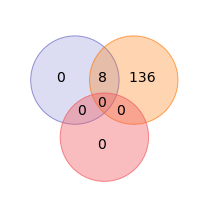

In [32]:
bt_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['BioTransformer'] > 0])
meteor_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Meteor'] > 0])
times_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['TIMES'] > 0])
tb_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['ToolBox'] > 0])

silico_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if (row['ToolBox'] > 0 or row['BioTransformer'] > 0 or row['Meteor'] > 0 or row['TIMES'] > 0)])
lit_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Reported'] > 0])
vitro_venn = set([row['InChIKey'] if row['Identifier_Level'] != 'Formula' else row['Identifier'] for idx, row in identificationDF.iterrows() if row['InChIKey'] != parentINCHIKEY]) 

labels = venn.get_labels([lit_venn, silico_venn, vitro_venn])
fig, ax = venn.venn4(labels, names=['Reported', 'Predicted', 'Measured'], colors = [default_colors[-1], default_colors[-2],default_colors[-3]], figsize = (3,3))
ax.get_legend().remove()
plt.tight_layout()
comp = 'Curcumin'
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\'+comp+r'_GenOverlap.tiff', dpi = 300)

In [25]:
#Find overlapping metabolites 
bt_union = bt_venn.intersection(vitro_venn)
meteor_union = meteor_venn.intersection(vitro_venn)
times_union = times_venn.intersection(vitro_venn)
tb_union = tb_venn.intersection(vitro_venn)
lit_union = lit_venn.intersection(vitro_venn)

labels = venn.get_labels([bt_union, meteor_union, times_union, tb_union, lit_union],fill=['number'])
for k in labels:
    if labels[k] == '0 ':
        labels.update({k : ''})
fig, ax = venn.venn5(labels, names=['BioTransformer', 'Meteor', 'TIMES', 'Toolbox', 'Reported'])

ZeroDivisionError: division by zero